# Глубокое обучение в компьютерном зрении. Интерактивный курс

## Продвинутые архитектуры свёрточных нейронных сетией

## Задание 3

- Обучить СНС с помощью Transfer Learning на датасете Food-101
- Использовать тонкую настройку существующей предобученной модели и методы аугментации данных.
- Библиотеки: [Python, Tensorflow]


In [71]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import tensorflow as tf
import tensorflow_datasets as tfds


### Загрузка датасета Food-101


In [72]:
tfds.enable_progress_bar()

(train_ds, test_ds), ds_info = tfds.load(
    'food101', 
    as_supervised=True,
    with_info=True,
    split=['train[:90%]', 'train[90%:]'],
)


In [73]:
# Features of Food101 TFDS
ds_info.features


FeaturesDict({
    'image': Image(shape=(None, None, 3), dtype=tf.uint8),
    'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=101),
})

In [74]:
# Get class names
class_names = ds_info.features["label"].names
class_names


['apple_pie',
 'baby_back_ribs',
 'baklava',
 'beef_carpaccio',
 'beef_tartare',
 'beet_salad',
 'beignets',
 'bibimbap',
 'bread_pudding',
 'breakfast_burrito',
 'bruschetta',
 'caesar_salad',
 'cannoli',
 'caprese_salad',
 'carrot_cake',
 'ceviche',
 'cheesecake',
 'cheese_plate',
 'chicken_curry',
 'chicken_quesadilla',
 'chicken_wings',
 'chocolate_cake',
 'chocolate_mousse',
 'churros',
 'clam_chowder',
 'club_sandwich',
 'crab_cakes',
 'creme_brulee',
 'croque_madame',
 'cup_cakes',
 'deviled_eggs',
 'donuts',
 'dumplings',
 'edamame',
 'eggs_benedict',
 'escargots',
 'falafel',
 'filet_mignon',
 'fish_and_chips',
 'foie_gras',
 'french_fries',
 'french_onion_soup',
 'french_toast',
 'fried_calamari',
 'fried_rice',
 'frozen_yogurt',
 'garlic_bread',
 'gnocchi',
 'greek_salad',
 'grilled_cheese_sandwich',
 'grilled_salmon',
 'guacamole',
 'gyoza',
 'hamburger',
 'hot_and_sour_soup',
 'hot_dog',
 'huevos_rancheros',
 'hummus',
 'ice_cream',
 'lasagna',
 'lobster_bisque',
 'lobster

## Визуализация датасета Cats vs Dogs


image  label
0   [[[233, 253, 251], [231, 253, 250], [228, 254,...     56
1   [[[23, 25, 22], [13, 15, 12], [7, 9, 6], [12, ...     76
2   [[[66, 79, 53], [67, 80, 54], [68, 80, 56], [6...     21
3   [[[118, 69, 88], [117, 68, 87], [114, 65, 84],...     64
4   [[[14, 14, 14], [14, 14, 14], [13, 13, 13], [1...     10
5   [[[35, 21, 18], [32, 17, 12], [32, 15, 8], [35...     70
6   [[[109, 104, 74], [102, 97, 67], [92, 85, 57],...     90
7   [[[9, 26, 20], [9, 26, 20], [8, 25, 19], [8, 2...    100
8   [[[37, 38, 30], [41, 42, 34], [44, 46, 35], [4...     21
9   [[[77, 50, 57], [77, 50, 57], [76, 50, 59], [7...     53
10  [[[226, 189, 144], [226, 183, 140], [240, 182,...     73
11  [[[0, 7, 15], [0, 7, 15], [0, 7, 15], [0, 7, 1...     33
12  [[[10, 7, 2], [10, 7, 2], [10, 7, 2], [9, 6, 1...     37
13  [[[150, 255, 252], [150, 255, 252], [153, 255,...     19
14  [[[85, 27, 23], [85, 27, 23], [87, 28, 22], [8...      4
15  [[[194, 179, 158], [194, 179, 158], [194, 179,...     70
16  [[[64, 27, 11], [73, 36, 20], [83, 46, 28], [8...     77
17  [[[214, 214, 206], [212, 212, 204], [211, 211,...     11
18  [[[252, 252, 242], [255, 255, 248], [255, 255,...     96
19  [[[172, 157, 150], [172, 157, 150], [173, 158,...    100
20  [[[12, 10, 11], [19, 17, 18], [17, 15, 16], [7...     18
21  [[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...     59
22  [[[137, 90, 74], [131, 84, 68], [130, 82, 68],...     80
23  [[[63, 30, 21], [72, 39, 30], [86, 56, 45], [1...     76
24  [[[203, 166, 148], [203, 166, 148], [204, 167,...     22
25  [[[13, 7, 9], [10, 4, 6], [10, 4, 6], [12, 6, ...     43
26  [[[18, 22, 33], [18, 22, 33], [17, 20, 29], [1...     76
27  [[[164, 175, 159], [167, 178, 162], [168, 177,...     33
28  [[[33, 8, 11], [33, 8, 11], [33, 8, 11], [33, ...      2
29  [[[104, 79, 59], [105, 80, 60], [106, 81, 61],...     92
30  [[[27, 19, 30], [27, 19, 30], [26, 18, 29], [2...      8
31  [[[84, 27, 7], [80, 23, 3], [80, 22, 2], [86, ...     48
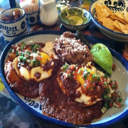
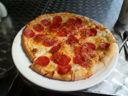
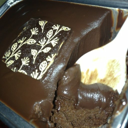
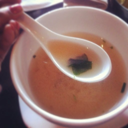
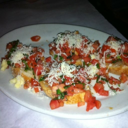
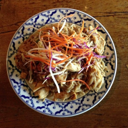
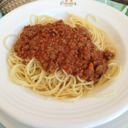
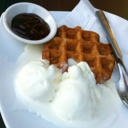
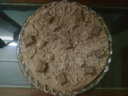
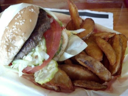
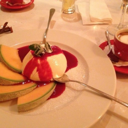
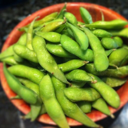
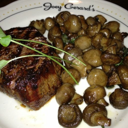
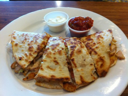
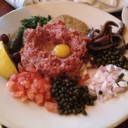
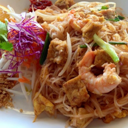
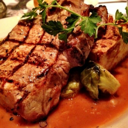
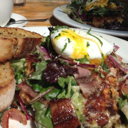
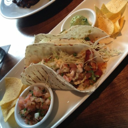
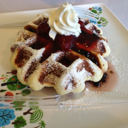
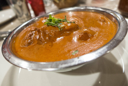
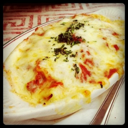
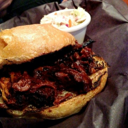
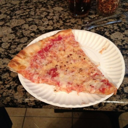
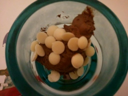
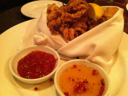
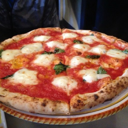
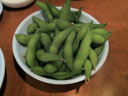
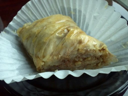
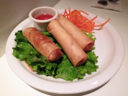
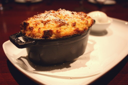
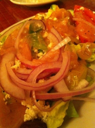

In [75]:
df_ds = tfds.as_dataframe(train_ds.take(32), ds_info)
df_ds


## Создание пайплайна данных


In [76]:
INP_SIZE = 128
NUM_EPOCHS = 10
BATCH_SIZE = 32

def prepare(img, label):
    img = tf.cast(img, tf.float32)/127. - 1.
    return tf.image.resize(img, (INP_SIZE, INP_SIZE)), label # В части аугментации данных применил только ресайз картинок, но без увеличения их количества. В дополнение можно ещё обучить СНС на оригинальном датасете, без ресайзинга, но это слишком долго по времени

train_ds = train_ds.shuffle(buffer_size=1000)
train_ds = train_ds.map(prepare)
train_ds = train_ds.batch(BATCH_SIZE, drop_remainder=True)

test_ds = test_ds.shuffle(buffer_size=1000)
test_ds = test_ds.map(prepare)
test_ds = test_ds.batch(128, drop_remainder=True)


## Подготовка модели CNN


In [77]:
if 0: # Обучение модели с нуля

    EXP_NAME = 'scratch'
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=(INP_SIZE, INP_SIZE, 3),
        include_top=False,
        weights=None,
    )
    base_model.trainable = True

else: # Transfer Learning

    EXP_NAME = 'transfer'
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=(INP_SIZE, INP_SIZE, 3),
        include_top=False,
        weights='imagenet',
    )
    base_model.trainable = True
    # base_model.trainable = False # Заморозка весов предобученной модели
    # base_model.trainable = True # Fine-tuning весов предобученной модели

model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])


## Подготовка к обучению


In [78]:
LEARNING_RATE = 0.0001
optimizer = tf.keras.optimizers.RMSprop(LEARNING_RATE)

model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy'])

#model.compile(optimizer='Adamax',
#              loss='SparseCategoricalCrossentropy',
#              metrics=['SparseCategoricalCrossentropy', 'SparseTopKCategoricalAccuracy'])

tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir='logs/'+EXP_NAME, 
    write_graph=False, update_freq=100, profile_batch=0)


## Model Summary


In [79]:
model.summary()


Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_128 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_10  (None, 1280)             0         
  (GlobalAveragePooling2D)                                       
                                                                 
 dense_11 (Dense)            (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 2,225,153
Non-trainable params: 34,112
_________________________________________________________________


## Обучение модели


In [ ]:
%%time

history = model.fit(
    train_ds,
    epochs=NUM_EPOCHS,
    validation_data=test_ds,
    callbacks=[tensorboard_callback])


Epoch 1/10
  64/2130 [..............................] - ETA: 1:22:52 - loss: -234.3309 - accuracy: 0.0137

## Оценка качества модели


In [ ]:
%%time

model.evaluate(test_ds)


## TensorBoard


In [ ]:
%load_ext tensorboard
%tensorboard --logdir logs


## Запуск предсказания на нашем изображении


In [ ]:
import imageio.v2 as imageio
from skimage.transform import resize

def prepare_image(img):
    img = img.astype(np.float32)/255.
    img = resize(img, (INP_SIZE, INP_SIZE), order=3, mode='reflect', anti_aliasing=True)
    return img.astype(np.float32)

img = imageio.imread('image.png', pilmode="RGB")
plt.imshow(img)
img = prepare_image(img)


In [ ]:
pred = model(img[None, ...], training=False)

pred_label = int(pred.numpy()[0][0] > 0.5)
print('Prediction: {}'.format(ds_info.features['label'].int2str(pred_label)))
